In [42]:
pip install optuna

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
import lightgbm as lgb
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

SEED = 42

np.random.seed(SEED)




In [44]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive/mycodelabs/atm')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data = pd.read_excel('/content/drive/My Drive/mycodelabs/atm/ncr_wb.xlsx', index_col='Index')

In [46]:
data.PCD.astype('category').cat.codes

Index
0        11
1        11
2         6
3        20
4         2
         ..
11447    21
11448    21
11449    21
11450    21
11451    21
Length: 11447, dtype: int8

In [47]:

data['City'] = data.City.astype('category').cat.codes
data['AFD'] = data.AFD.astype('category').cat.codes
data['CCD'] = data.CCD.astype('category').cat.codes
data['RCD'] = data.RCD.astype('category').cat.codes
data['PCD_Names'] = data.PCD
class_names=data.sort_values(by=['PCD']).PCD_Names.unique()
data['PCD'] = data.PCD.astype('category').cat.codes
print(data.head())
#X = data[['CCD','RCD','AFD']].values
X = data[['AFD','CCD']].values
y = data['PCD'].values
y_names = data['PCD']

       City  AERT  AFD  CCD  RCD  PCD  CRS          PCD_Names
Index                                                        
0         2     2   33  113   13   11    0  NON-REMEDIAL CALL
1         2    21   33  113   13   11    0  NON-REMEDIAL CALL
2         2    27   12  143    0    6    1   DISPENSE PROBLEM
3         2    97   30  189   17   20    1     SCREEN/DISPLAY
4         2     2    3   24    2    2    1    CARD READER JAM


In [48]:
print(y.shape)

(11447,)


In [49]:
print(y)

[11 11  6 ... 21 21 21]


In [50]:
name = y_names.unique()
name.sort()
print(name)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=167)

In [52]:
def objective(trial):
    kernel = trial.suggest_categorical("kernel", ['rbf']) 
    if kernel == 'poly':
        degree = trial.suggest_int("degree", 1, 3)
        clf = svm.SVC(verbose=True, gamma='scale',decision_function_shape='ovo', kernel=kernel, degree=degree)
    else:
        C = trial.suggest_float("C", 1.0, 25,step=0.05)
        #tol = trial.suggest_float("tol", 1e-5, 1e-3, log=True)
        clf = svm.SVC(verbose=True, gamma='scale',decision_function_shape='ovo', kernel=kernel,C=C)
    clf.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    return clf.score(X_test, y_test)

def objective_random_forest(trial):
    criterion = trial.suggest_categorical("criterion", ['gini','entropy']) 
    max_samples = trial.suggest_int("max_samples", 10,X_train.shape[0]) 
    #kernel = trial.suggest_int("max_samples", 10,X_train.shape[0]) 
    clf = RandomForestClassifier(max_samples=max_samples, criterion=criterion, random_state=167)

    clf.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    return clf.score(X_test, y_test)



In [53]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
print(study.best_value)
study.best_params

[I 2021-08-27 17:11:35,094] A new study created in memory with name: no-name-9e8fc466-876a-4b6d-b7d8-0311aab9672f


[LibSVM]

[I 2021-08-27 17:11:36,758] Trial 0 finished with value: 0.8620087336244542 and parameters: {'kernel': 'rbf', 'C': 4.6}. Best is trial 0 with value: 0.8620087336244542.


[LibSVM]

[I 2021-08-27 17:11:38,444] Trial 1 finished with value: 0.8620087336244542 and parameters: {'kernel': 'rbf', 'C': 9.35}. Best is trial 0 with value: 0.8620087336244542.


[LibSVM]

[I 2021-08-27 17:11:40,025] Trial 2 finished with value: 0.8430858806404657 and parameters: {'kernel': 'rbf', 'C': 2.1500000000000004}. Best is trial 0 with value: 0.8620087336244542.


[LibSVM]

[I 2021-08-27 17:11:41,895] Trial 3 finished with value: 0.8631732168850073 and parameters: {'kernel': 'rbf', 'C': 17.75}. Best is trial 3 with value: 0.8631732168850073.


[LibSVM]

[I 2021-08-27 17:11:43,497] Trial 4 finished with value: 0.8620087336244542 and parameters: {'kernel': 'rbf', 'C': 3.75}. Best is trial 3 with value: 0.8631732168850073.


[LibSVM]

[I 2021-08-27 17:11:45,177] Trial 5 finished with value: 0.8593886462882097 and parameters: {'kernel': 'rbf', 'C': 9.9}. Best is trial 3 with value: 0.8631732168850073.


[LibSVM]

[I 2021-08-27 17:11:46,760] Trial 6 finished with value: 0.826783114992722 and parameters: {'kernel': 'rbf', 'C': 1.55}. Best is trial 3 with value: 0.8631732168850073.


[LibSVM]

[I 2021-08-27 17:11:48,521] Trial 7 finished with value: 0.8631732168850073 and parameters: {'kernel': 'rbf', 'C': 12.700000000000001}. Best is trial 3 with value: 0.8631732168850073.


[LibSVM]

[I 2021-08-27 17:11:50,267] Trial 8 finished with value: 0.8631732168850073 and parameters: {'kernel': 'rbf', 'C': 14.8}. Best is trial 3 with value: 0.8631732168850073.


[LibSVM]

[I 2021-08-27 17:11:52,128] Trial 9 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 19.150000000000002}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:11:54,076] Trial 10 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 22.8}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:11:55,980] Trial 11 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 24.650000000000002}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:11:57,907] Trial 12 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 23.55}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:11:59,788] Trial 13 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 19.900000000000002}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:12:01,696] Trial 14 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 20.200000000000003}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:12:03,589] Trial 15 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 21.400000000000002}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:12:05,386] Trial 16 finished with value: 0.8631732168850073 and parameters: {'kernel': 'rbf', 'C': 16.05}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:12:07,252] Trial 17 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 20.200000000000003}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:12:09,154] Trial 18 finished with value: 0.8637554585152838 and parameters: {'kernel': 'rbf', 'C': 21.400000000000002}. Best is trial 9 with value: 0.8637554585152838.


[LibSVM]

[I 2021-08-27 17:12:11,026] Trial 19 finished with value: 0.8631732168850073 and parameters: {'kernel': 'rbf', 'C': 18.25}. Best is trial 9 with value: 0.8637554585152838.


0.8637554585152838


{'C': 19.150000000000002, 'kernel': 'rbf'}

In [54]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_random_forest, n_trials=20)
print(study.best_value)
study.best_params

[I 2021-08-27 17:12:11,050] A new study created in memory with name: no-name-20ab776b-988b-45e5-8087-9dbdf435b98a
[I 2021-08-27 17:12:11,478] Trial 0 finished with value: 0.868122270742358 and parameters: {'criterion': 'entropy', 'max_samples': 2235}. Best is trial 0 with value: 0.868122270742358.
[I 2021-08-27 17:12:11,878] Trial 1 finished with value: 0.868122270742358 and parameters: {'criterion': 'gini', 'max_samples': 3075}. Best is trial 0 with value: 0.868122270742358.
[I 2021-08-27 17:12:12,299] Trial 2 finished with value: 0.868122270742358 and parameters: {'criterion': 'entropy', 'max_samples': 1772}. Best is trial 0 with value: 0.868122270742358.
[I 2021-08-27 17:12:12,708] Trial 3 finished with value: 0.868122270742358 and parameters: {'criterion': 'gini', 'max_samples': 4247}. Best is trial 0 with value: 0.868122270742358.
[I 2021-08-27 17:12:13,145] Trial 4 finished with value: 0.8684133915574963 and parameters: {'criterion': 'gini', 'max_samples': 4832}. Best is trial 4 

0.8687045123726347


{'criterion': 'entropy', 'max_samples': 6244}

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=167)

start_time = time.time()
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
end_time = time.time()

computational_time = end_time - start_time

print('Computational Time: ', computational_time)


Computational Time:  0.5509324073791504


In [56]:
with open('saved_svm_model', 'wb' ) as f:
    pickle.dump(clf, f)

In [57]:
#Sensitivity Analysis
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score)
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

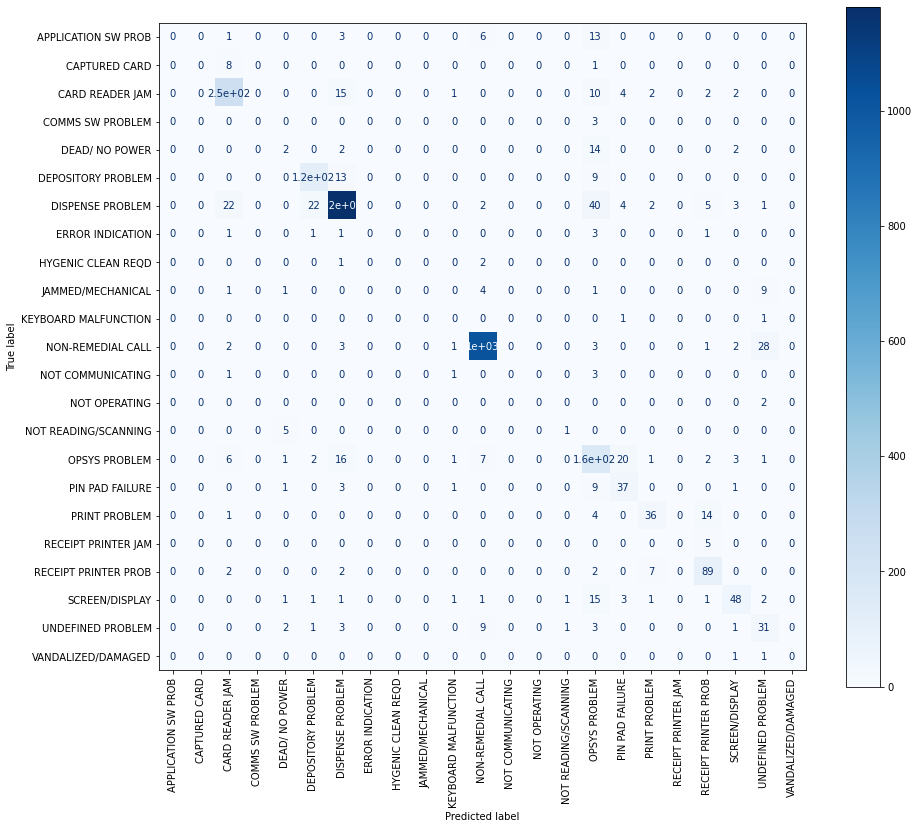

In [58]:
disp = plot_confusion_matrix(clf, X_test, y_test,
display_labels = class_names,
cmap=plt.cm.Blues)
fig = plt.gcf()
fig.set_size_inches(14.5, 12.5)
plt.xticks(rotation=90)
#plt.savefig('media/conf_matrix.png', dpi=300)
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()
#print(classification_report(y_test, y_pred))

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00         9
           2       0.85      0.88      0.86       288
           3       0.00      0.00      0.00         3
           4       0.15      0.10      0.12        20
           5       0.81      0.84      0.83       139
           6       0.95      0.92      0.94      1281
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         2
          11       0.97      0.96      0.97      1063
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       0.33      0.17      0.22         6
          15       0.55      0.73      0.63       225
          16       0.54      0.71      0.61        52
          17       0.73    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [60]:
print(class_names)
np.unique(y_test)


['APPLICATION SW PROB' 'CAPTURED CARD' 'CARD READER JAM'
 'COMMS SW PROBLEM' 'DEAD/ NO POWER' 'DEPOSITORY PROBLEM'
 'DISPENSE PROBLEM' 'ERROR INDICATION' 'HYGENIC CLEAN REQD'
 'JAMMED/MECHANICAL' 'KEYBOARD MALFUNCTION' 'NON-REMEDIAL CALL'
 'NOT COMMUNICATING' 'NOT OPERATING' 'NOT READING/SCANNING'
 'OPSYS PROBLEM' 'PIN PAD FAILURE' 'PRINT PROBLEM' 'RECEIPT PRINTER JAM'
 'RECEIPT PRINTER PROB' 'SCREEN/DISPLAY' 'UNDEFINED PROBLEM'
 'VANDALIZED/DAMAGED']


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int8)

In [61]:
#TODO calculate TP,FP,TN,FN
cnf_matrix = confusion_matrix(y_test, y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
AUC = (1+TPR-FPR)/2

GMean =np.sqrt(TPR*TNR)
MCC = (TP*TN-FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in true_divide



In [62]:
mat = {'Class':class_names,'TPR':TPR,'TNR':TNR,'FPR':FPR,'FNR':FNR,'ACC':ACC,'AUC':AUC,'G-Mean':GMean,'MCC':MCC}
matrices_data = pd.DataFrame(data=mat)
print(matrices_data)
matrices_data.to_csv('/content/drive/My Drive/mycodelabs/atm/results RF.csv')

                   Class       TPR       TNR  ...       AUC    G-Mean       MCC
0    APPLICATION SW PROB  0.000000  1.000000  ...  0.500000  0.000000       NaN
1          CAPTURED CARD  0.000000  1.000000  ...  0.500000  0.000000       NaN
2        CARD READER JAM  0.875000  0.985701  ...  0.930350  0.928702  0.848774
3       COMMS SW PROBLEM  0.000000  1.000000  ...  0.500000  0.000000       NaN
4         DEAD/ NO POWER  0.100000  0.996779  ...  0.548389  0.315718  0.119917
5     DEPOSITORY PROBLEM  0.841727  0.991808  ...  0.916767  0.913691  0.819558
6       DISPENSE PROBLEM  0.921155  0.970752  ...  0.945954  0.945629  0.897556
7       ERROR INDICATION  0.000000  1.000000  ...  0.500000  0.000000       NaN
8     HYGENIC CLEAN REQD  0.000000  1.000000  ...  0.500000  0.000000       NaN
9      JAMMED/MECHANICAL  0.000000  1.000000  ...  0.500000  0.000000       NaN
10  KEYBOARD MALFUNCTION  0.000000  0.998252  ...  0.499126  0.000000 -0.001010
11     NON-REMEDIAL CALL  0.962371  0.98

In [65]:
y_pred_proba = clf.predict_proba(X_test)

In [66]:
y_pred_proba

array([[0.00977822, 0.        , 0.        , ..., 0.00039376, 0.00433106,
        0.        ],
       [0.00988448, 0.        , 0.03461388, ..., 0.03400325, 0.        ,
        0.        ],
       [0.        , 0.        , 0.01089686, ..., 0.        , 0.00457184,
        0.        ],
       ...,
       [0.00988448, 0.        , 0.03461388, ..., 0.03400325, 0.        ,
        0.        ],
       [0.00977822, 0.        , 0.        , ..., 0.00039376, 0.00433106,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
from sklearn.metrics import  roc_auc_score
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.8403231079531804